# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = 'C:/Users/User/Desktop/에이블스쿨/4기 미니프로젝트/2차 미니프로젝트_콜택시 대기시간 예측/1. 데이터/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
# !pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [6]:
file1 = 'data2.pkl'
data = joblib.load(path + file1)

In [7]:
data.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,MA_wt7,ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,73.0,37.0,8.66,Friday,1,Winter,2015,0.0,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,98.0,29.0,10.47,Monday,1,Winter,2015,0.0,NaN,0.877647


In [8]:
data.shape

(2922, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2922 non-null   datetime64[ns]
 1   car_cnt          2922 non-null   int64         
 2   request_cnt      2922 non-null   int64         
 3   ride_cnt         2922 non-null   int64         
 4   waiting_time     2922 non-null   float64       
 5   fare             2922 non-null   int64         
 6   distance         2922 non-null   int64         
 7   target           2922 non-null   float64       
 8   temp_max         2922 non-null   float64       
 9   temp_min         2922 non-null   float64       
 10  rain(mm)         2922 non-null   float64       
 11  humidity_max(%)  2922 non-null   float64       
 12  humidity_min(%)  2922 non-null   float64       
 13  sunshine(MJ/m2)  2922 non-null   float64       
 14  weekday          2922 non-null   categor

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [10]:
data.isna().sum()

Date               0
car_cnt            0
request_cnt        0
ride_cnt           0
waiting_time       0
fare               0
distance           0
target             0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
weekday            0
month              0
season             0
year               0
holiday            0
MA_wt7             6
ride_rate          0
dtype: int64

In [11]:
data1 = data.fillna({'holiday':0})

In [12]:
data1.dropna(axis = 0, inplace = True)
data1.reset_index(drop=True, inplace=True)

### (2) 가변수화

In [13]:
# 범주형(가변수화 대상) 변수 리스트(목록) 작성
dumm_var = ['weekday','season','month','year']

# 리스트로 가변수화 수행. 
data2 = pd.get_dummies(data1, columns = dumm_var, drop_first = True)
data2

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,...,month_10,month_11,month_12,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022
0,2015-01-07,410,4085,3676,24.7,2230,8646,21.2,-0.2,-9.2,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-08,419,4030,3728,21.2,2231,8683,21.8,3.2,-6.8,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-09,424,4167,3813,21.8,2215,8506,41.2,4.3,-5.5,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-10,215,1916,1645,41.2,2447,11123,28.8,2.3,-4.0,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-11,187,1700,1572,28.8,2419,10806,23.2,3.4,-7.2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2022-12-26,603,5555,4605,39.2,2163,7889,44.4,3.0,-7.3,...,False,False,True,False,False,False,False,False,False,True
2912,2022-12-27,669,5635,4654,44.4,2198,8178,44.8,-0.3,-5.4,...,False,False,True,False,False,False,False,False,False,True
2913,2022-12-28,607,5654,4648,44.8,2161,7882,52.5,1.7,-7.8,...,False,False,True,False,False,False,False,False,False,True
2914,2022-12-29,581,5250,4247,52.5,2229,8433,38.3,2.1,-4.0,...,False,False,True,False,False,False,False,False,False,True


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [14]:
# validation : 2022-10-01 ~ 
size = 91
idx = data2.shape[0] - size
date_list = data2.iloc[ idx : , 0]

#### 1) x, y 나누기

In [15]:
# x와 y 분리
target = 'target'
x = data2.drop([target, 'Date'], axis = 1)
y = data2.loc[:, target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = size, shuffle = False)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [17]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [18]:
# pip install xgboost

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [20]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

#### 1) 모델1

In [21]:
m1 = LinearRegression()
m1.fit(x_train, y_train)

p1 = m1.predict(x_val)

print('MAE  : ', mean_absolute_error(y_val, p1))
print('MAPE : ', mean_absolute_percentage_error(y_val, p1))

MAE  :  4.312749656158748
MAPE :  0.1072161857167715


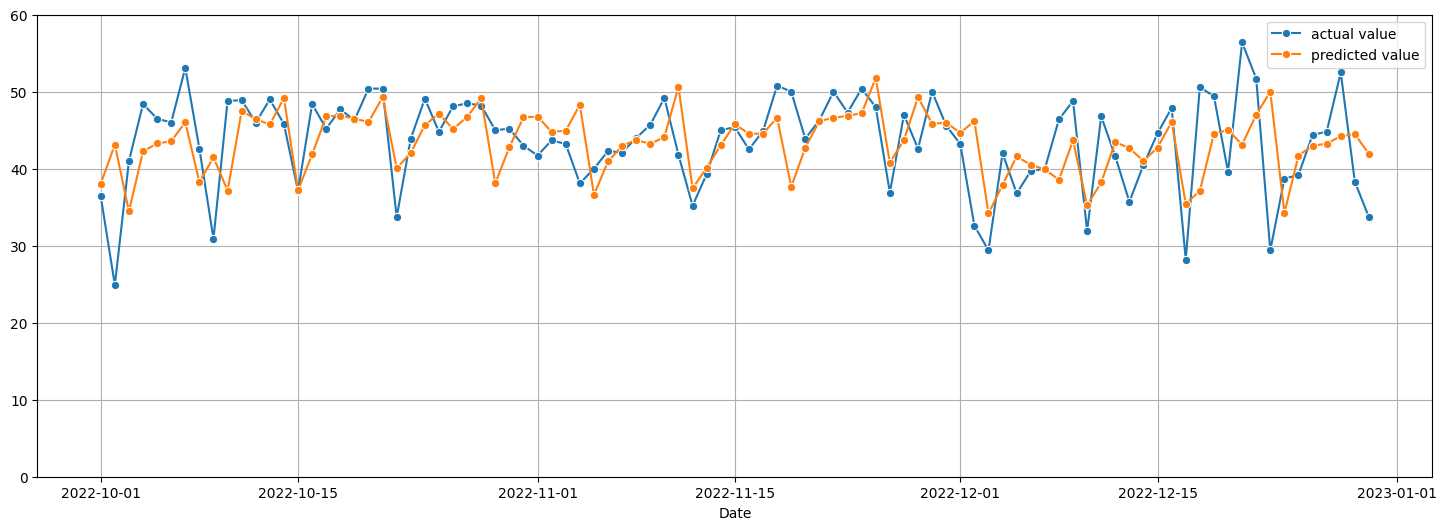

In [22]:
pred_plot(y_val, p1, date_list)

#### 2) 모델2

In [23]:
params = {'n_neighbors':range(2,20,1), 'metric':['manhattan','euclidean']}
m2 = GridSearchCV(KNeighborsRegressor(), params, cv = 5)
m2.fit(x_train_s, y_train)
print(m2.best_params_)

p2 = m2.predict(x_val_s)

print('MAE  : ', mean_absolute_error(y_val, p2))
print('MAPE : ', mean_absolute_percentage_error(y_val, p2))

{'metric': 'manhattan', 'n_neighbors': 11}
MAE  :  6.333366633366634
MAPE :  0.14522541115270277


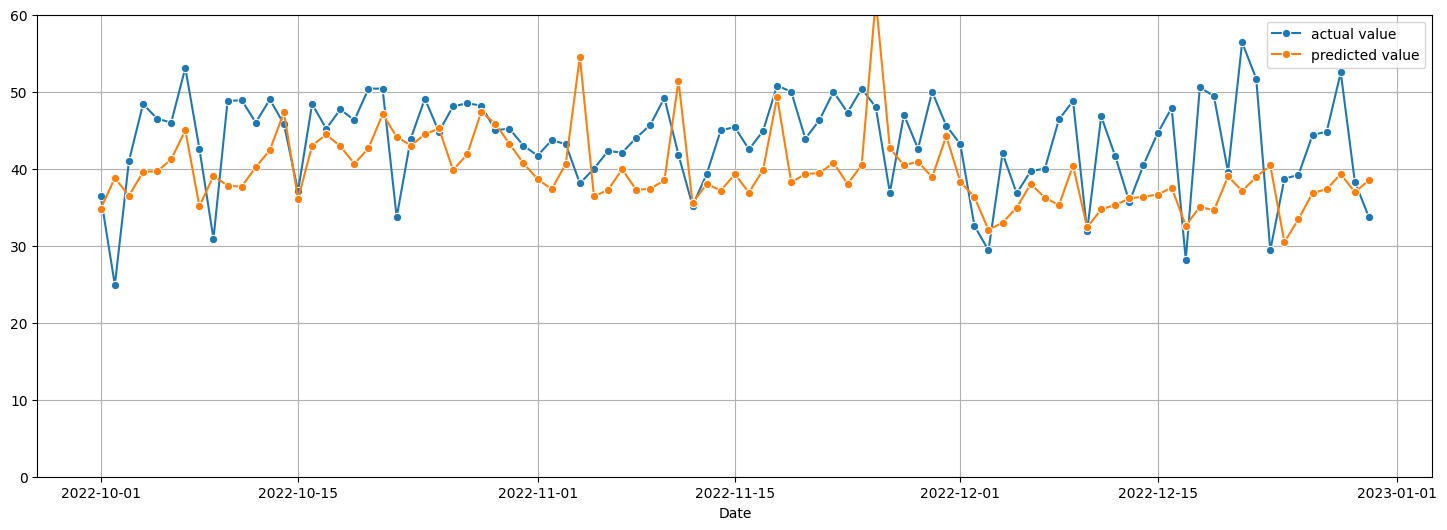

In [24]:
pred_plot(y_val, p2, date_list)

#### 3) 모델3

In [25]:
m3 = RandomForestRegressor()
m3.fit(x_train, y_train)

p3 = m3.predict(x_val)

print('MAE  : ', mean_absolute_error(y_val, p3))
print('MAPE : ', mean_absolute_percentage_error(y_val, p3))

MAE  :  4.7429999999999986
MAPE :  0.11705861907679468


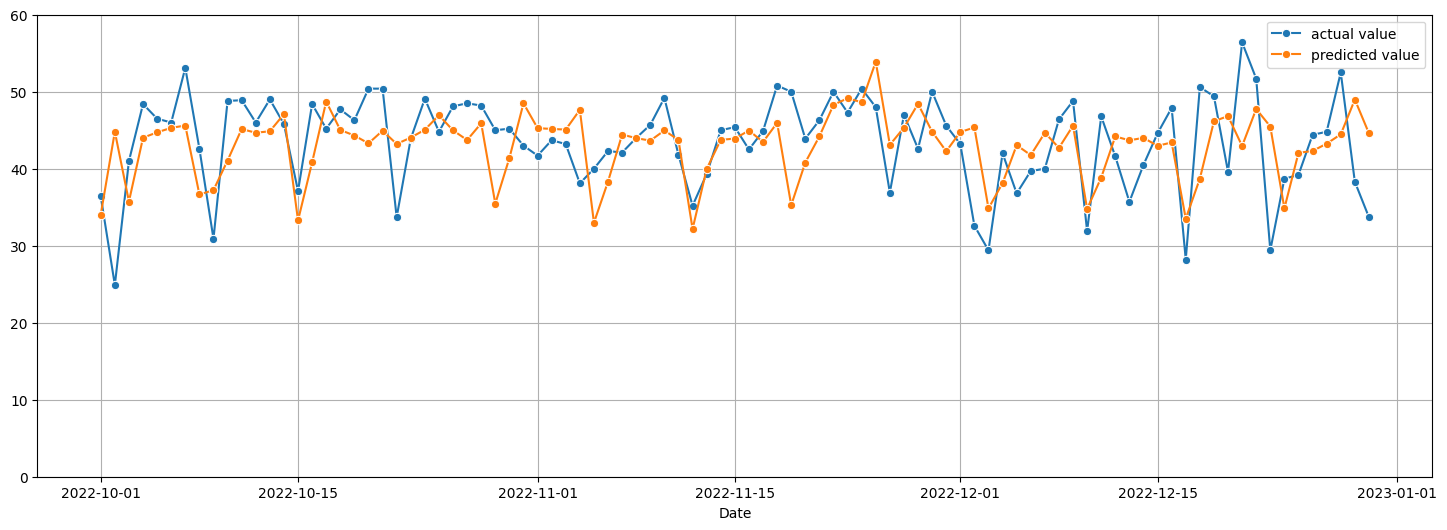

In [26]:
pred_plot(y_val, p3, date_list)

#### 4) 모델4

In [27]:
params = {'max_depth':range(3,7), 'learning_rate':[0.1]}
m4 = GridSearchCV(XGBRegressor(), params, cv = 5)
m4.fit(x_train, y_train)
print(m4.best_params_)

p4 = m4.predict(x_val)

print('MAE  : ', mean_absolute_error(y_val, p4))
print('MAPE : ', mean_absolute_percentage_error(y_val, p4))

{'learning_rate': 0.1, 'max_depth': 4}
MAE  :  4.5387804387689945
MAPE :  0.11234710796701097


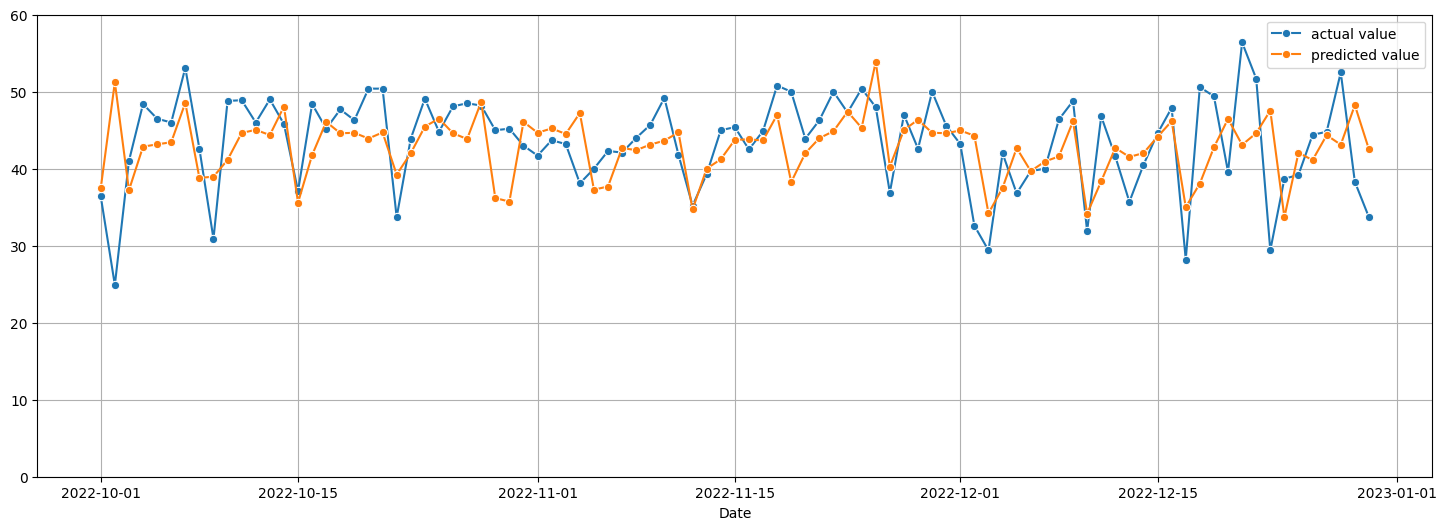

In [28]:
pred_plot(y_val, p4, date_list)

## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [29]:
model_no = ['m1','m2', 'm3', 'm4']
algorithm = ['LinearRegression','KNN', 'RF', 'XGB']
pred = [p1, p2, p3, p4]

result = pd.DataFrame({'model_no':[], 'algorithm':[],'MAE':[],'MAPE':[]})

for i in range(len(pred)) :
    mae = mean_absolute_error(y_val, pred[i])
    mape = mean_absolute_percentage_error(y_val, pred[i])

    row = [model_no[i], algorithm[i], mae, mape]
    result.loc[i] = row

result

,model_no,algorithm,MAE,MAPE
0,m1,LinearRegression,4.312750,0.107216
1,m2,KNN,6.333367,0.145225
2,m3,RF,4.743000,0.117059
3,m4,XGB,4.538780,0.112347


In [30]:
# XGB, RF, LinearRegression 모델의 성능이 우수합니다.

In [ ]:
import random

random.sample(range(1,41),10)